1) Give a count of all videos currently out.

In [1]:
# SELECT count(*)
# FROM rental R
# WHERE R.return_date IS NULL

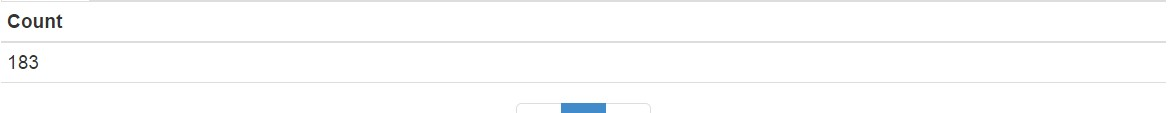

In [2]:
from IPython.display import Image
Image('hw4 - 1.jpg')

2) Make a list of all customer names who have videos out and how much they owe. (Based on weekly rental rate, without considering late fee)

In [3]:
# SELECT first_name, last_name, owed
# FROM (SELECT customer_id,
#        sum(rental_amount) as owed
# FROM
#   (SELECT customer_id,
#           rental_id,
#           (rental_rate*days_out/7) AS Rental_amount
#    FROM
#      (SELECT R.customer_id,
#              F.film_id,
#              R.rental_id,
#              F.rental_duration,
#              F.rental_rate,
#              R.last_update,
#              R.rental_date,
#              (R.last_update::date-R.rental_date::date) AS days_out
#       FROM rental R,
#            inventory I,
#            film F
#       WHERE R.inventory_id = I.inventory_id
#         AND I.film_id = F.film_id
#         AND R.return_date IS NULL) T) T2
# GROUP BY customer_id) T3, customer C
# WHERE C.customer_id = T3.customer_id

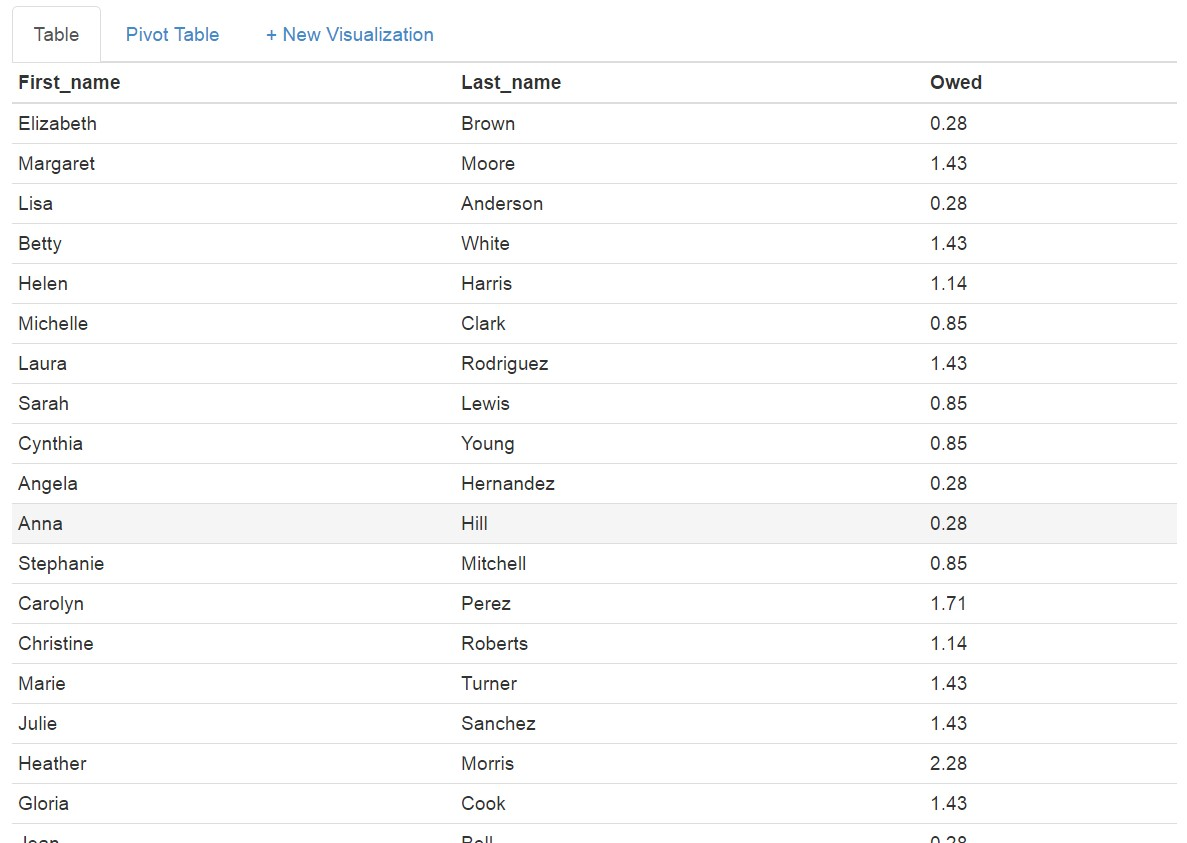

In [4]:
Image('hw4 - 2.jpg')

5) What hour of the day do people rent the most ?

In [5]:
# SELECT hour, count(*) as count
# FROM (SELECT date_part('hour', rental_date) as hour
# FROM rental) T
# GROUP BY hour
# ORDER BY count desc
# LIMIT 1

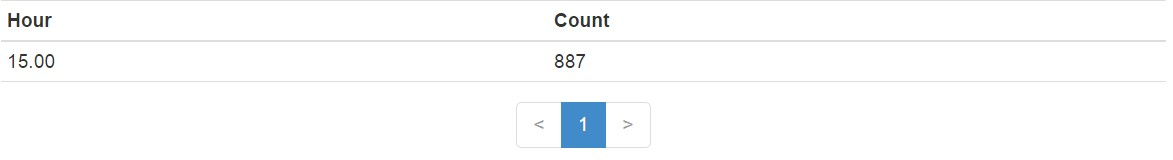

In [6]:
Image('hw4 - 5.jpg')

6) Which store is more profitable, assuming all movies cost $15 per inventory item to purchase.

In [7]:
# SELECT (r.revenues - c.costs) AS profits, r.store_id
# FROM
#   (SELECT sum(p.amount) AS revenues,
#           f.store_id
#    FROM payment p,
#         staff f
#    WHERE p.staff_id = f.staff_id
#    GROUP BY f.store_id) r,
#   (SELECT count(inventory_id)*15 AS costs,
#           store_id
#    FROM inventory
#    GROUP BY store_id) c
# WHERE r.store_id = c.store_id

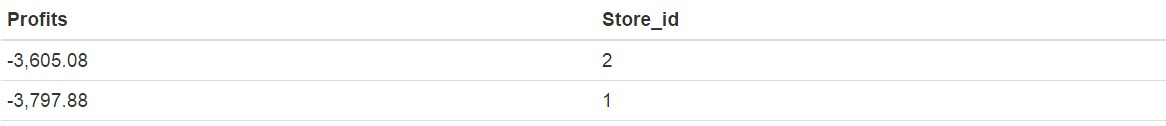

In [8]:
Image('hw4 - 6.jpg')

Store 2 is more profitable because its net loss is less. 